In [1]:
from math import sin,pi,cos,sqrt
from numpy import array,arange
from pylab import plot, xlabel,ylabel, show,legend,grid,title,xlim, ylim

In [2]:
#constantes
m= 1 #kg
c1 = 0
c2 = 0.1
g = 9.8 #m/s^2

def f(R,t,C): 
    x = R[0]
    vx = R[1]
    y = R[2]
    vy = R[3]
    fvx = -C*vy*sqrt(vx**2 + vy**2)/(2*m)   
    fvy = -g-C*vy*sqrt(vx**2 + vy**2)/(2*m)
    return array ([vx,fvx,vy,fvy],float)

In [3]:
def funcion(C): 
    ti = 0       #tiempo inicial
    tf = 5   #tiempo final
    N=1000    #numero de paso
    h=(tf-ti)/N  #tamaño del paso

    #valores iniciales
    v = 15 #m/s   
    theta = (45*pi)/180 
    vx0 = v*cos(theta)        
    vy0 = v*sin(theta)        
    x0=0               
    y0=0               

    tpoints = arange(ti, tf, h)    
    xpoints = []             # arreglo vacio que se llenara con las posiciones en x 
    ypoints = []             # arreglo vacio que se llenara con las posiciones en y

    R = array([x0, vx0, y0, vy0], float)  #Arreglo que contiene lo valores iniciales y que se va llenando con los valores dados por el metodo RK4

    for t in tpoints:              #Implementamos  RK4 
        xpoints.append(R[0])       
        ypoints.append(R[2])
    
        k1 = h * f(R, t, C)
        k2 = h * f(R + 0.5 * k1, t + 0.5 * h, C)
        k3 = h * f(R + 0.5 * k2, t + 0.5 * h, C)
        k4 = h * f(R + k3, t + h, C)
        R += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return xpoints, ypoints 

El alcanze horizontal para un tiro parabolico es:
    
\begin{equation}
x_{max}=\frac{v_{0}^{2}sen(2\theta)}{g}
\end{equation}

\begin{equation}
x_{max}=\frac{15^{2}sen(2*45)}{9.8})=22.95[m]
\end{equation}

In [5]:
x1,y1=funcion(c1)
lista1=[]     
for i in range (len(x1)):  # calculamos la cordenada donde Y es cero que nos indica el alcanze horizontal
    if -0.009< y1[i] <0.009:
        lista1.append(i)
        
Xmax1 = (x1[max(lista1)])  # alcanze maximo horizontal
print("Xmaximo = ", Xmax1)

Xmaximo =  22.963292719033106


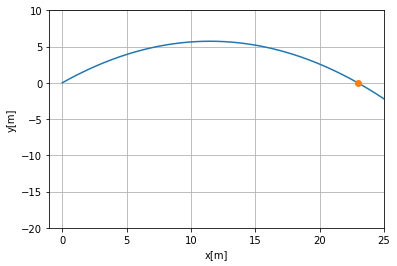

In [7]:
plot(x1,y1)
plot(Xmax1,y1[max(lista1)], 'o')
plot()
ylim(-20,10)
xlim(-1,25)
xlabel('x[m]')
ylabel('y[m]')
grid()
show()

In [9]:
x2,y2=funcion(c2)
lista2=[]     
for i in range (len(x2)): 
    if -0.009< y2[i] <0.009:
        lista2.append(i)
        
Xmax2= (x2[max(lista2)])  # alcanze maximo horizontal
print("Xmaximo = ", Xmax2)

Xmaximo =  16.31409312670343


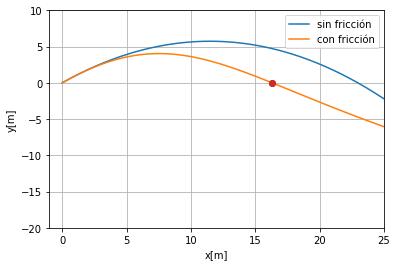

In [19]:
plot(x1,y1, label="sin fricción")
plot(x2,y2, label="con fricción")
plot(Xmax1, y1[max(lista1)],'o' )
plot(Xmax2, y2[max(lista2)], 'o')
plot()
ylim(-20,10)
xlim(-1,25)
xlabel('x[m]')
ylabel('y[m]')
grid()
legend()
show()